<a href="https://colab.research.google.com/github/bustanularifin666/MachineLearningTasks/blob/main/TaskWeek4/Data_Visualization_House_Pricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1103228224 Muhammad Bustanul Arifin Nur Fathurrahman
# Import library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact, widgets


In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = '/content/drive/MyDrive/Dataset/kc_house_data.csv'

Mounted at /content/drive


In [3]:
# Membaca dataset menjadi dataframe
df = pd.read_csv(data)

# Sekarang, Anda dapat melakukan operasi dan analisis data pada 'df'.
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
unique_counts = df.nunique()

unique_counts

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [12]:
# List fitur-fitur numerical
numerical_features = ['price', 'bedrooms', 'bathrooms', 'floors', 'grade', 'yr_built']

# Fitur target
target = ['price']

# Menampilkan hasil pengelompokkan
print("Numerical  : ", numerical_features)
print("Target  : ", target)

Numerical  :  ['price', 'bedrooms', 'bathrooms', 'floors', 'grade', 'yr_built']
Target  :  ['price']


<Figure size 1200x800 with 0 Axes>

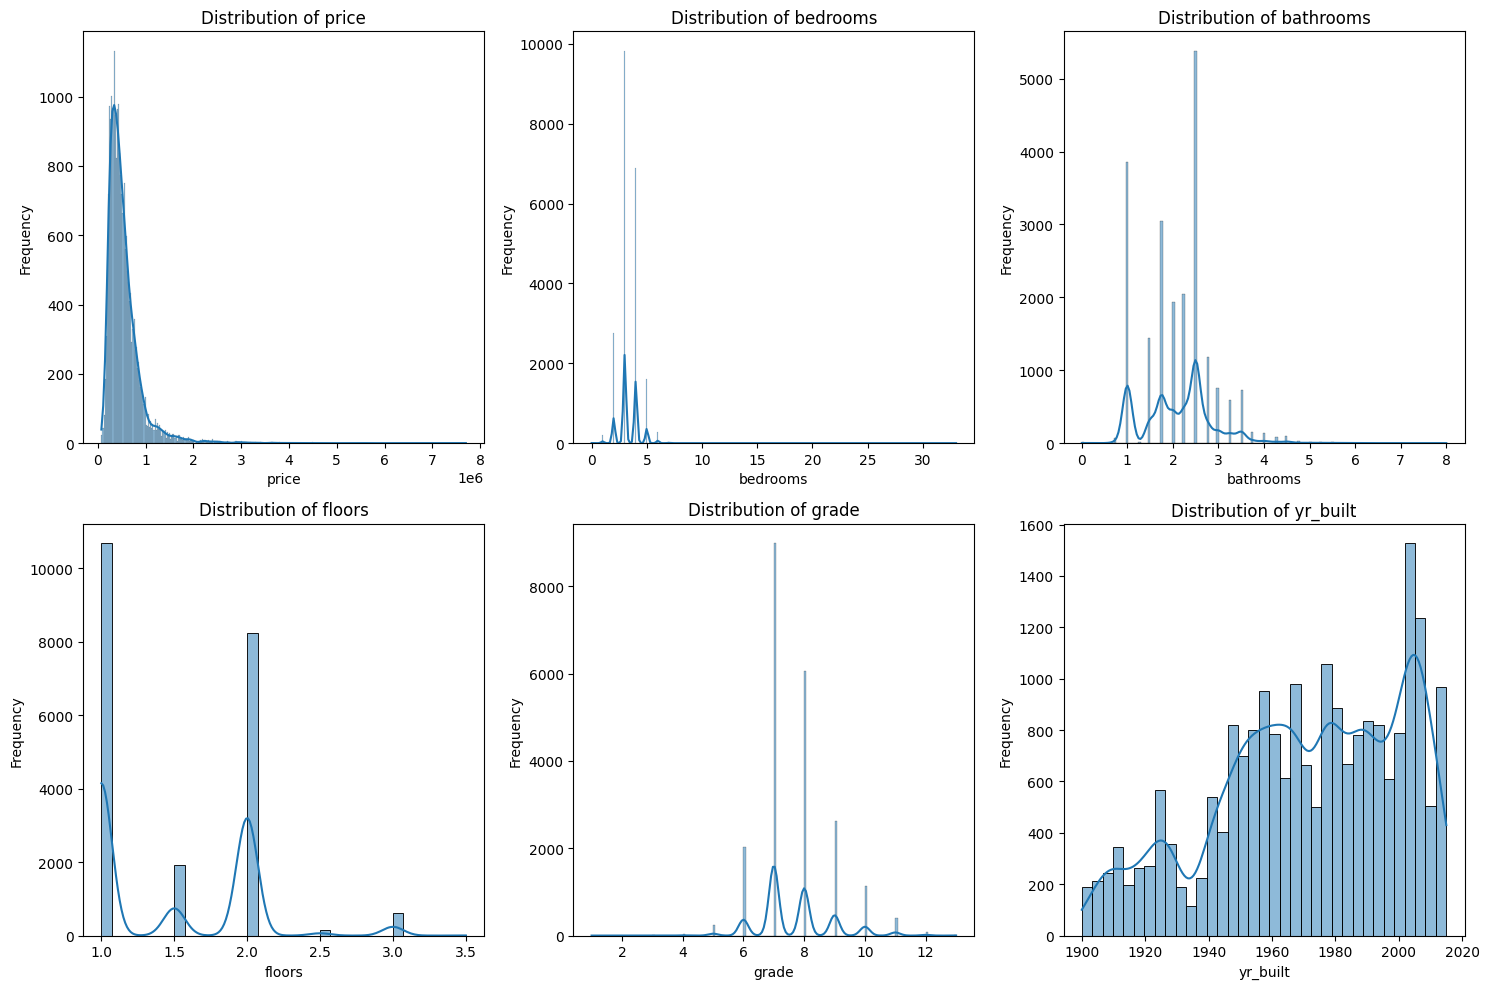

In [14]:
# Menghitung jumlah masing-masing kategori
category_counts = df[numerical_features].apply(lambda x: x.value_counts())

# Menentukan ukuran plot
plt.figure(figsize=(12, 8))

# # Loop untuk membuat bar chart untuk setiap kolom kategorikal
# for i, column in enumerate(category_counts.columns, 1):
#     plt.subplot(2, 2, i)
#     sns.countplot(x=column, data=df)
#     plt.title(f'Bar Chart of {column}')

# # Menampilkan plot
# plt.tight_layout()
# plt.show()

# Membuat subplot dengan 2 baris dan 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Memplot histogram untuk masing-masing fitur numerical dalam subplot
for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Menyesuaikan tata letak subplot
plt.tight_layout()
plt.show()

In [17]:
# Membuat dataframe dengan numerical features
numerical_df = df[numerical_features]

# Membuat plot interaktif dengan opsi bin width
fig = px.histogram(
    numerical_df,
    x='price',  # Ganti 'carat' dengan fitur yang ingin Anda visualisasikan
    nbins=30,  # Jumlah awal bin
    title='Interactive Histogram with Bin Width Control'
)

# Menambahkan opsi interaktif untuk mengubah bin width
fig.update_xaxes(
    type='linear',  # Menggunakan skala linier untuk mengubah bin width
    tickvals=[10, 20, 30, 40],  # Nilai-nilai bin width yang dapat dipilih
    ticktext=['10', '20', '30', '40'],  # Label untuk nilai-nilai bin width
)

# Menampilkan plot interaktif
fig.show()

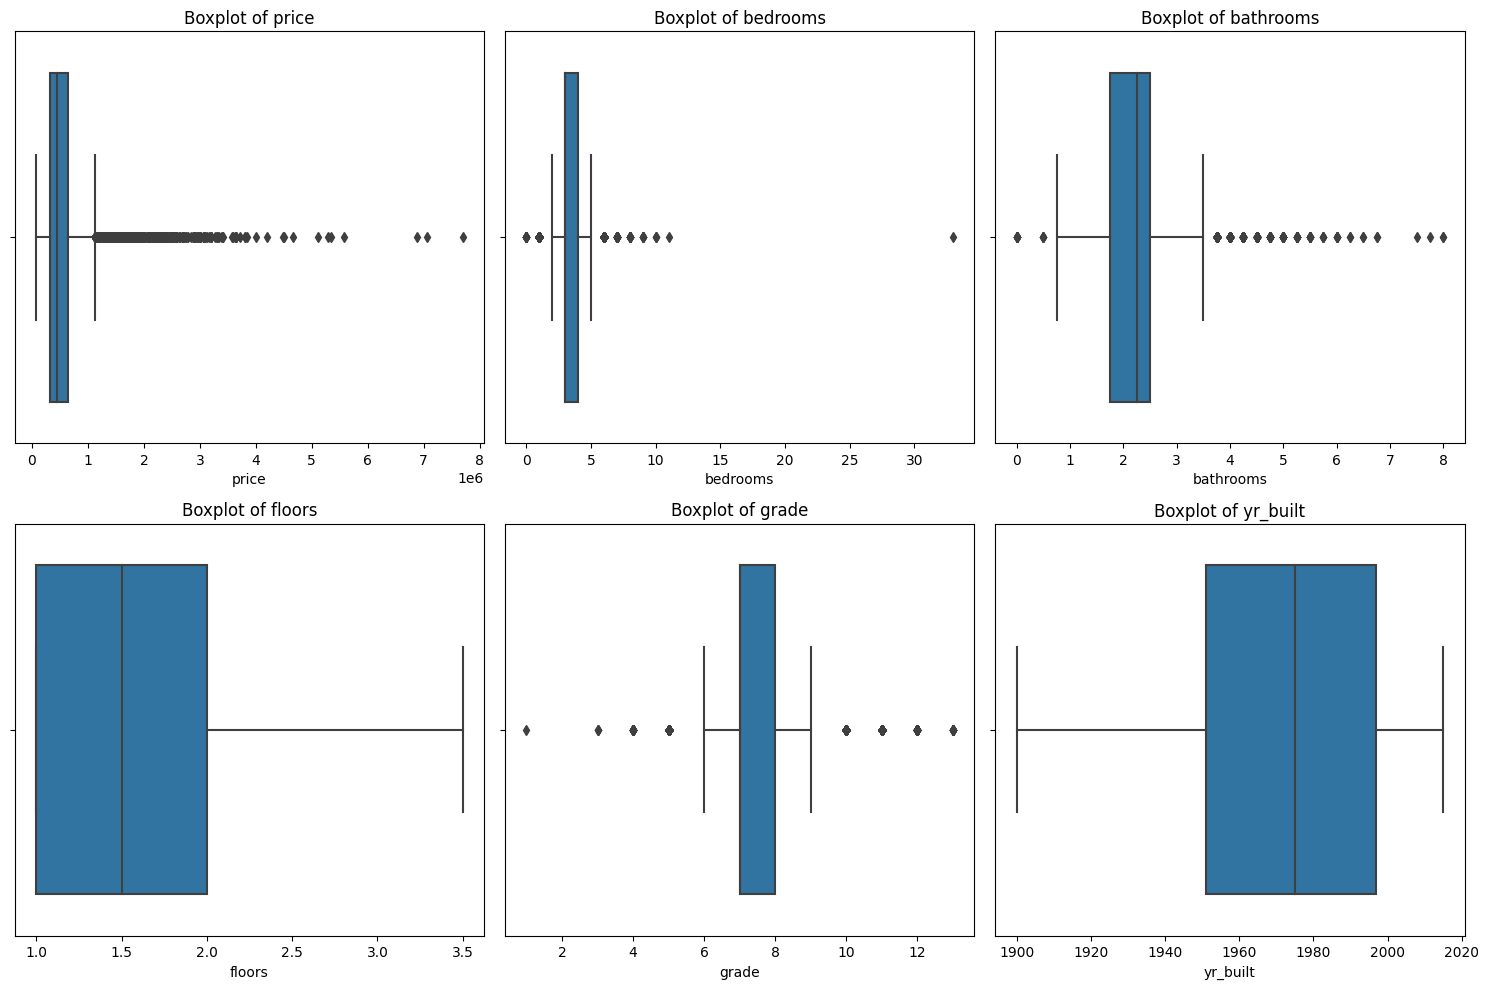

In [18]:
# Membuat subplot dengan 2 baris dan 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Memplot boxplot untuk masing-masing fitur numerical dalam subplot
for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_xlabel(feature)

# Menyesuaikan tata letak subplot
plt.tight_layout()
plt.show()

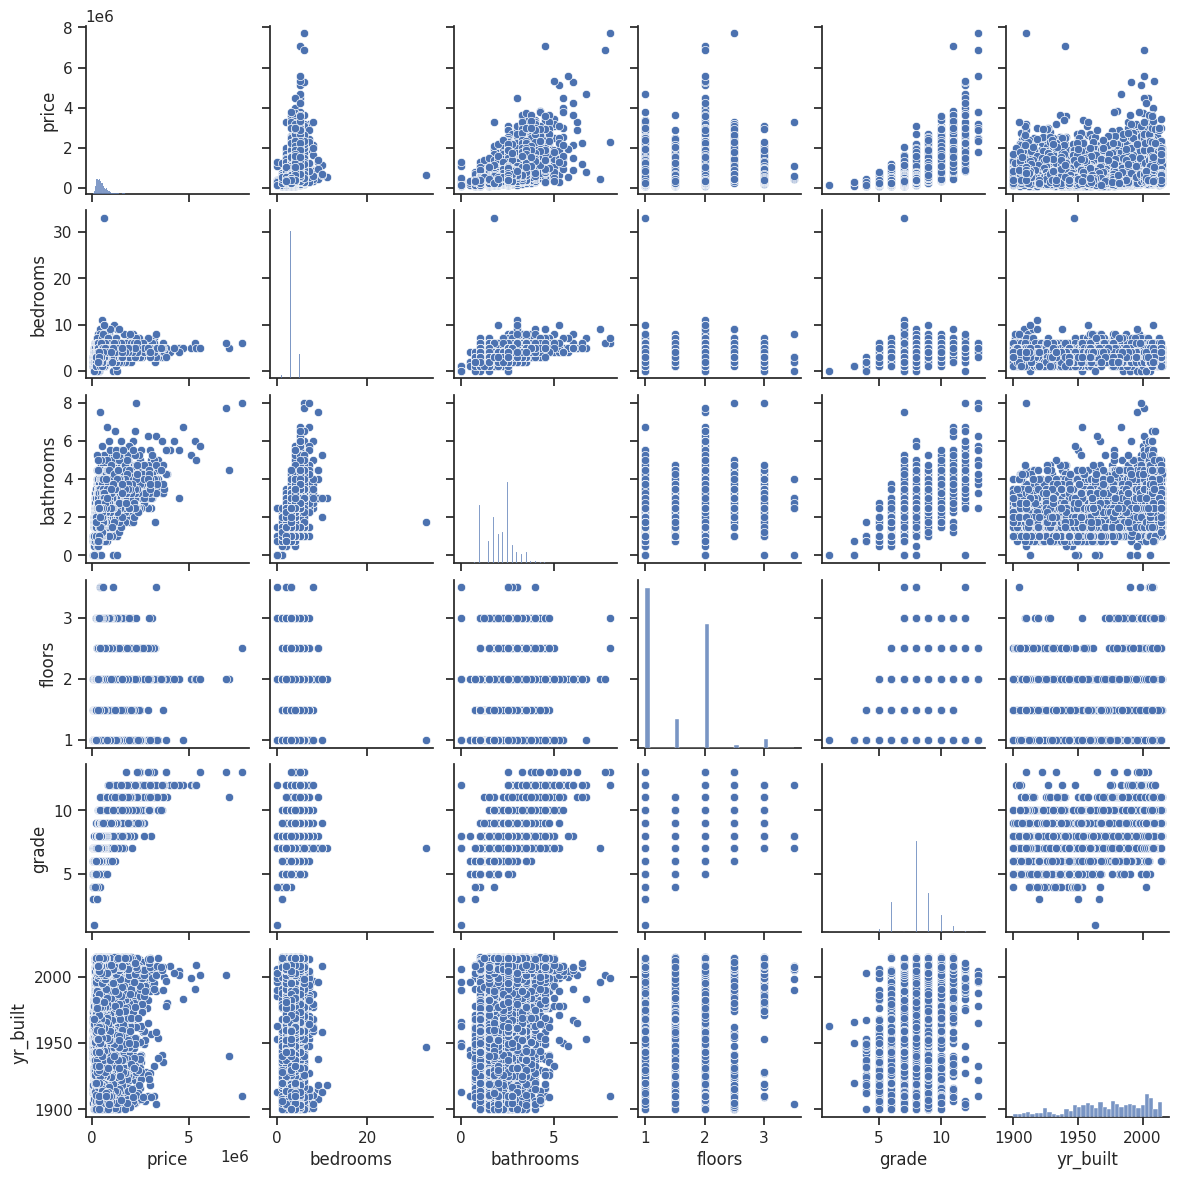

In [19]:
# Membuat scatter plot untuk setiap pasangan fitur
sns.set(style="ticks")
sns.pairplot(df[numerical_features], height=2)
plt.show()


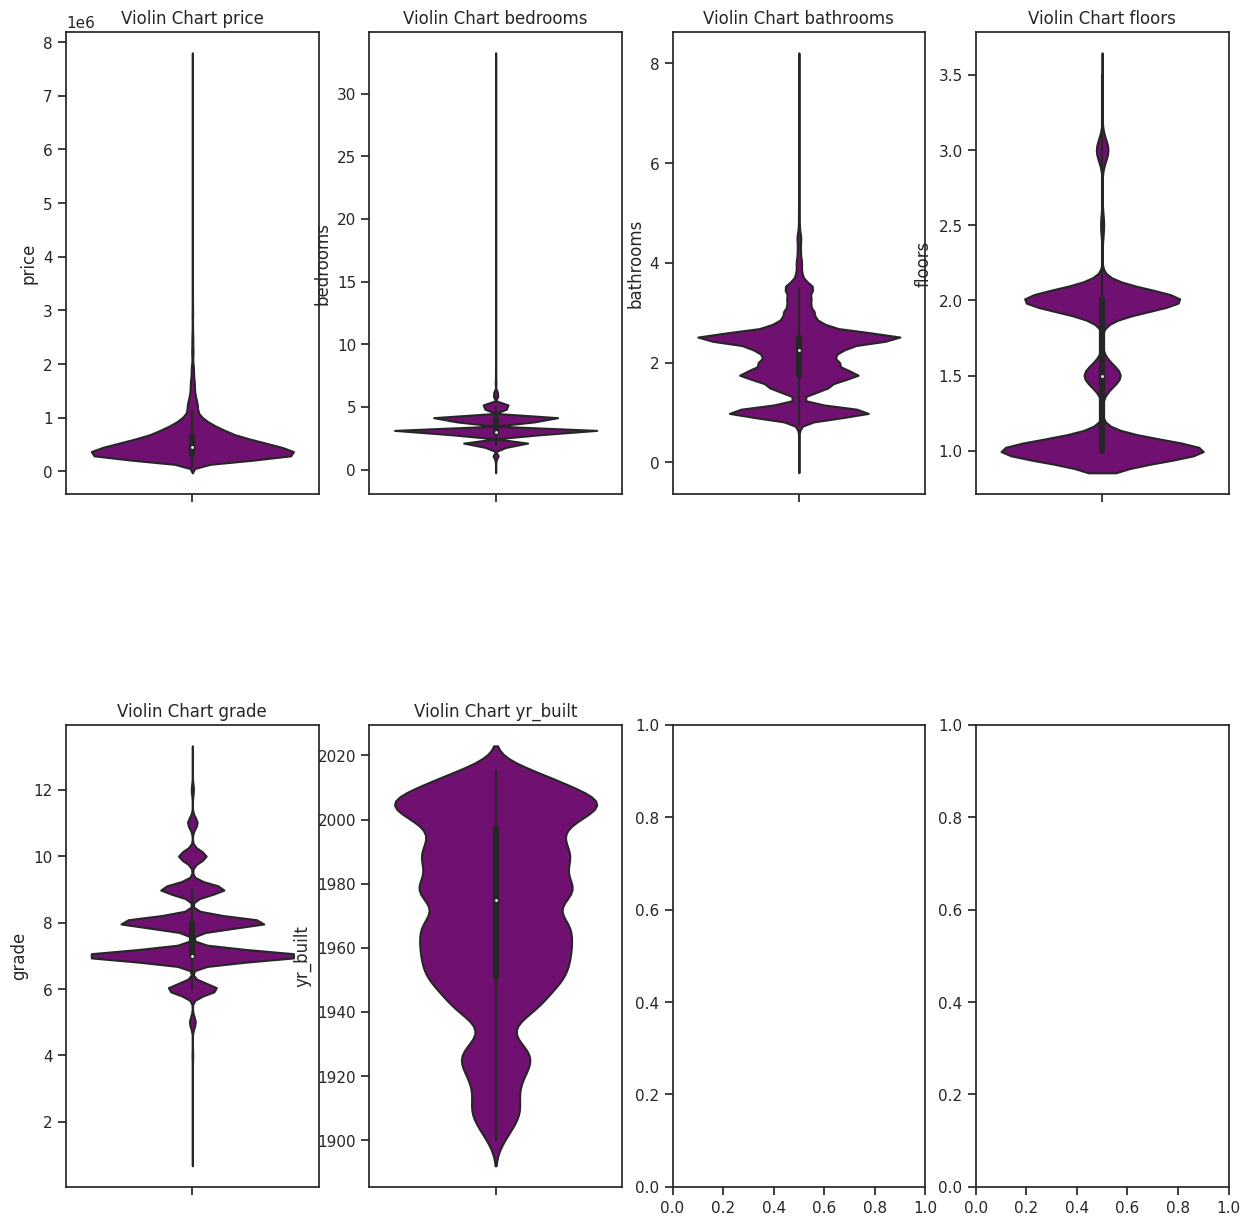

In [22]:
# Membuat subplot dengan 4 baris dan 2 kolom
fig, axes = plt.subplots(2, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 4)
    ax = axes[row, col]

    # Membuat violin chart dengan orientasi vertikal
    sns.violinplot(y=df[feature], ax=ax, color="purple")

    ax.set_title(f'Violin Chart {feature}')
    ax.set_ylabel(feature)
    ax.set_xlabel("")

plt.show()